In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
import pandas as pd

from collections import OrderedDict

In [2]:
def pretty_dataset_name(dataset_name):
    if dataset_name == 'eth':
        return 'ETH - Univ'
    elif dataset_name == 'hotel':
        return 'ETH - Hotel'
    elif dataset_name == 'univ':
        return 'UCY - Univ'
    elif dataset_name == 'zara1':
        return 'UCY - Zara 1'
    elif dataset_name == 'zara2':
        return 'UCY - Zara 2'
    else:
        return dataset_name

In [3]:
dataset_names = ['eth', 'hotel', 'univ', 'zara1', 'zara2', 'Average']
alg_name = "Ours"

# Displacement Error Analysis

In [79]:
prior_work_fse_results = {
    'ETH - Univ': OrderedDict([('Linear', 2.94), ('Vanilla LSTM', 2.41), ('Social LSTM', 2.35), ('Social Attention', 3.74)]),
    'ETH - Hotel': OrderedDict([('Linear', 0.72), ('Vanilla LSTM', 1.91), ('Social LSTM', 1.76), ('Social Attention', 2.64)]),
    'UCY - Univ': OrderedDict([('Linear', 1.59), ('Vanilla LSTM', 1.31), ('Social LSTM', 1.40), ('Social Attention', 0.52)]),
    'UCY - Zara 1': OrderedDict([('Linear', 1.21), ('Vanilla LSTM', 0.88), ('Social LSTM', 1.00), ('Social Attention', 2.13)]),
    'UCY - Zara 2': OrderedDict([('Linear', 1.48), ('Vanilla LSTM', 1.11), ('Social LSTM', 1.17), ('Social Attention', 3.92)]),
    'Average': OrderedDict([('Linear', 1.59), ('Vanilla LSTM', 1.52), ('Social LSTM', 1.54), ('Social Attention', 2.59)])
}


# These are for a prediction horizon of 12 timesteps.
prior_work_ade_results = {
    'ETH - Univ': OrderedDict([('Linear', 1.33), ('Vanilla LSTM', 1.09), ('Social LSTM', 1.09), ('Social Attention', 0.39)]),
    'ETH - Hotel': OrderedDict([('Linear', 0.39), ('Vanilla LSTM', 0.86), ('Social LSTM', 0.79), ('Social Attention', 0.29)]),
    'UCY - Univ': OrderedDict([('Linear', 0.82), ('Vanilla LSTM', 0.61), ('Social LSTM', 0.67), ('Social Attention', 0.20)]),
    'UCY - Zara 1': OrderedDict([('Linear', 0.62), ('Vanilla LSTM', 0.41), ('Social LSTM', 0.47), ('Social Attention', 0.30)]),
    'UCY - Zara 2': OrderedDict([('Linear', 0.77), ('Vanilla LSTM', 0.52), ('Social LSTM', 0.56), ('Social Attention', 0.33)]),
    'Average': OrderedDict([('Linear', 0.79), ('Vanilla LSTM', 0.70), ('Social LSTM', 0.72), ('Social Attention', 0.30)])
}

linestyles = ['--', '-.', '-', ':']

In [81]:
mean_markers = 'X'
marker_size = 7
line_colors = ['#1f78b4','#33a02c','#fb9a99','#e31a1c']
area_colors = ['#80CBE5','#ABCB51', '#F05F78']
area_rgbs = list()
for c in area_colors:
    area_rgbs.append([int(c[i:i+2], 16) for i in (1, 3, 5)])

In [94]:
# Load Ours
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}*attention_radius_3*fde_most_likely.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']
perf_df = perf_df.rename(columns={"metric": "error_type", "value": "error_value"})

results/eth_attention_radius_3_fde_most_likely.csv
results/hotel_attention_radius_3_fde_most_likely.csv
results/univ_attention_radius_3_fde_most_likely.csv
results/zara1_attention_radius_3_fde_most_likely.csv
results/zara2_attention_radius_3_fde_most_likely.csv


,error_value,error_type,type,dataset,method
0,0.242668,fde,ml,eth,Ours
1,0.158331,fde,ml,eth,Ours
2,0.095482,fde,ml,eth,Ours
3,1.069288,fde,ml,eth,Ours
4,1.734359,fde,ml,eth,Ours


In [95]:
# Load Trajectron and GAN
errors_df = pd.concat([pd.read_csv(f) for f in glob.glob('csv/old/curr_*_errors.csv')], ignore_index=True)
del errors_df['data_precondition']
errors_df = errors_df[~(errors_df['method'] == 'our_full')]
errors_df = errors_df[~(errors_df['error_type'] == 'mse')]
errors_df.loc[errors_df['error_type'] =='fse', 'error_type'] = 'fde'
#errors_df.loc[errors_df['error_type'] =='mse', 'error_type'] = 'ade'
errors_df.loc[errors_df['method'] == 'our_most_likely', 'method'] = 'Trajectron'

In [96]:
perf_df = perf_df.append(errors_df)
errors_df

/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,dataset,method,run,node,sample,error_type,error_value
2186000,hotel,sgan,0,Pedestrian/0,0,fde,4.045972
2186001,hotel,sgan,0,Pedestrian/0,1,fde,3.717624
2186002,hotel,sgan,0,Pedestrian/0,2,fde,5.378286
2186003,hotel,sgan,0,Pedestrian/0,3,fde,4.215567
2186004,hotel,sgan,0,Pedestrian/0,4,fde,4.663851
...,...,...,...,...,...,...,...
77099995,zara2,sgan,99,Pedestrian/35,1995,fde,0.620136
77099996,zara2,sgan,99,Pedestrian/35,1996,fde,0.681608
77099997,zara2,sgan,99,Pedestrian/35,1997,fde,0.860765
77099998,zara2,sgan,99,Pedestrian/35,1998,fde,0.545317


/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

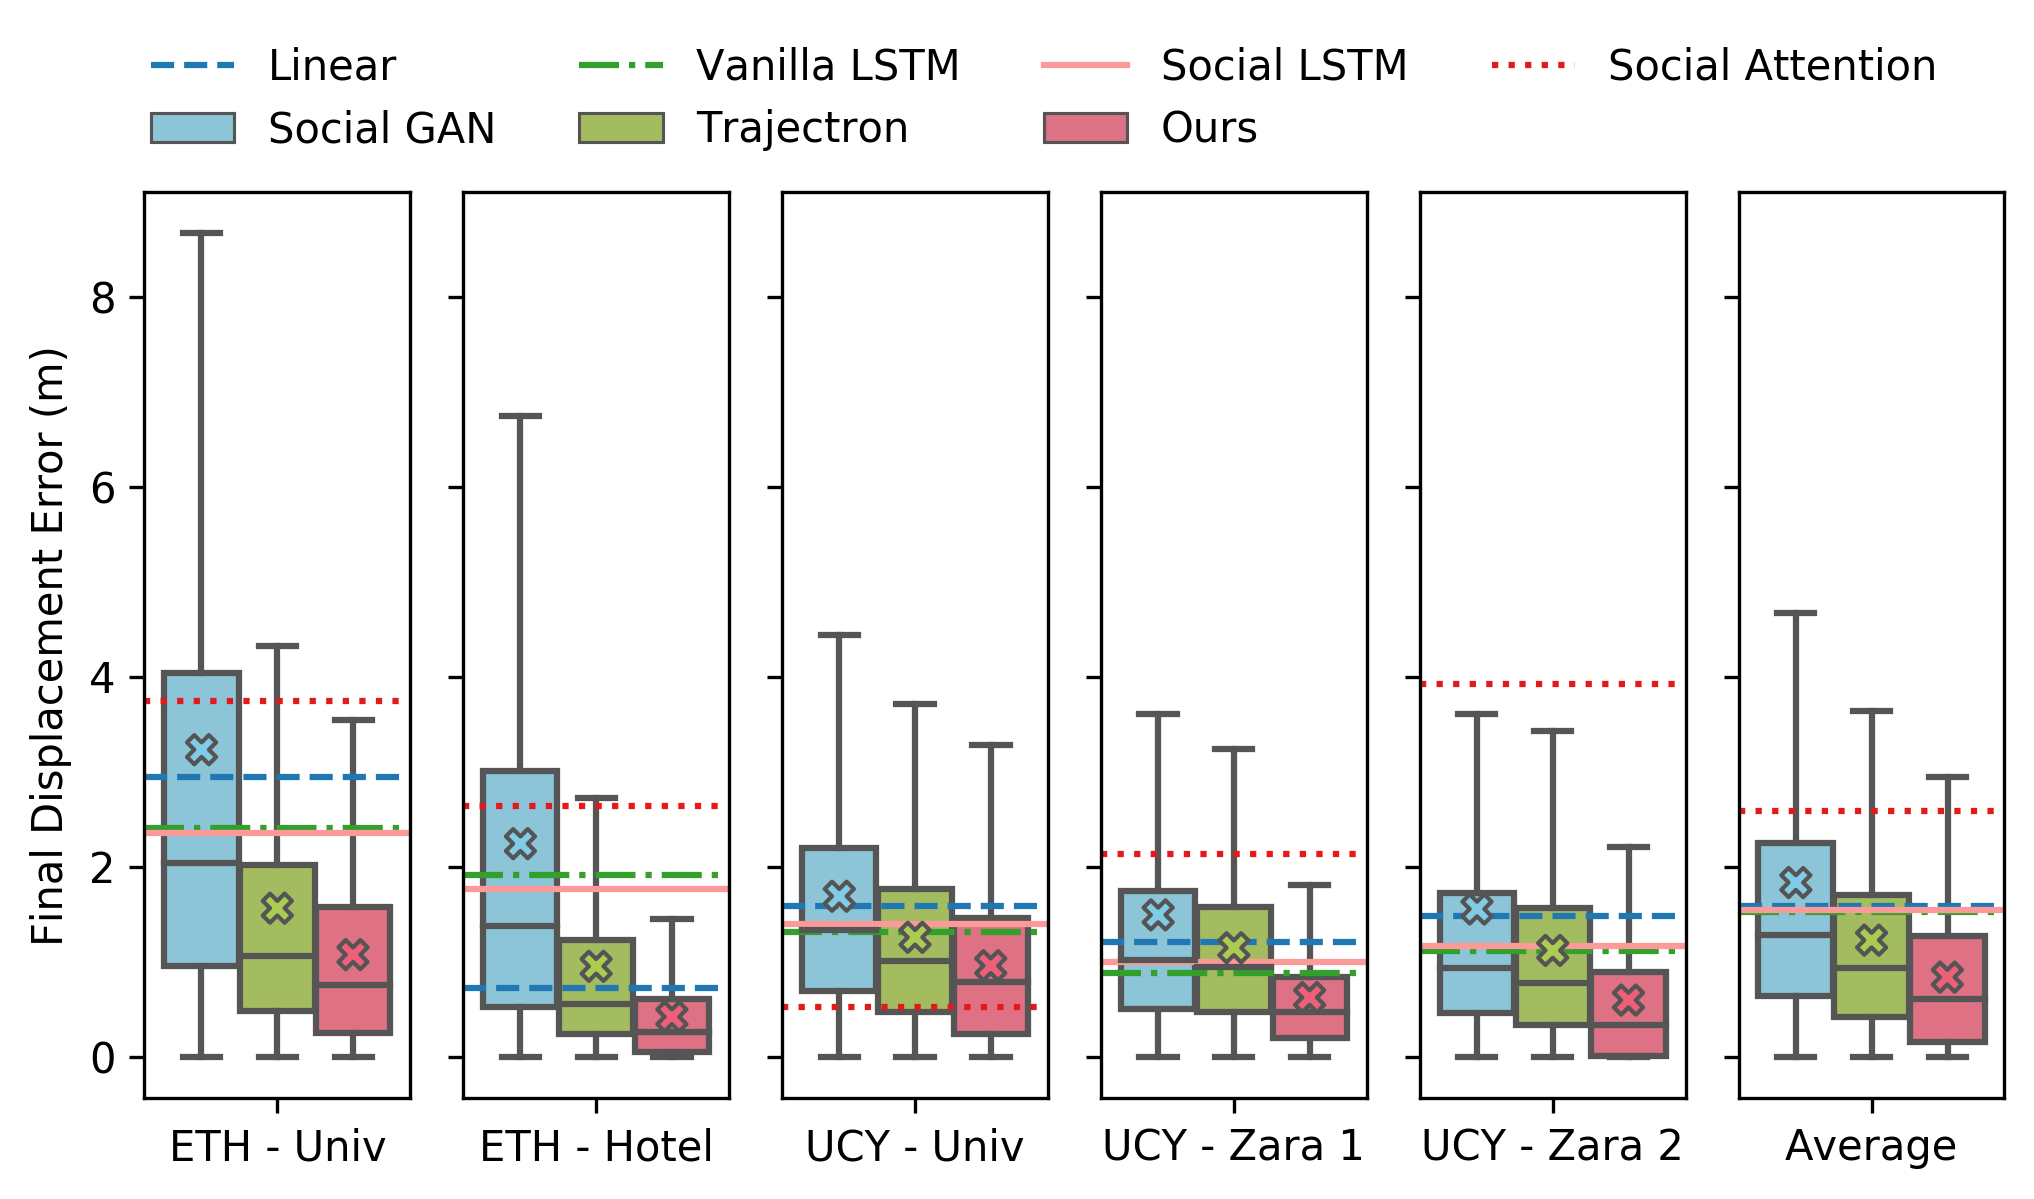

In [97]:
with sns.color_palette("muted"):
    fig_fse, ax_fses = plt.subplots(nrows=1, ncols=6, figsize=(8, 4), dpi=300, sharey=True)
    for idx, ax_fse in enumerate(ax_fses):
        dataset_name = dataset_names[idx]
        if dataset_name != 'Average':
            specific_df = perf_df[(perf_df['dataset'] == dataset_name) & (perf_df['error_type'] == 'fde')]
            specific_df['dataset'] = pretty_dataset_name(dataset_name)
        else:
            specific_df = perf_df[(perf_df['error_type'] == 'fde')].copy()
            specific_df['dataset'] = 'Average'

        sns.boxplot(x='dataset', y='error_value', hue='method',
            data=specific_df, ax=ax_fse, showfliers=False,
            palette=area_colors, hue_order=['sgan', 'Trajectron', alg_name], width=2.)
        
        ax_fse.get_legend().remove()
        ax_fse.set_xlabel('')
        ax_fse.set_ylabel('' if idx > 0 else 'Final Displacement Error (m)')

        ax_fse.scatter([-0.665, 0, 0.665],
               [np.mean(specific_df[specific_df['method'] == 'sgan']['error_value']),
                np.mean(specific_df[specific_df['method'] == 'Trajectron']['error_value']),
                np.mean(specific_df[specific_df['method'] == alg_name]['error_value'])],
               s=marker_size*marker_size, c=np.asarray(area_rgbs)/255.0, marker=mean_markers,
               edgecolors='#545454', zorder=10)
        
        for baseline_idx, (baseline, fse_val) in enumerate(prior_work_fse_results[pretty_dataset_name(dataset_name)].items()):
            ax_fse.axhline(y=fse_val, label=baseline, color=line_colors[baseline_idx], linestyle=linestyles[baseline_idx])
            
        if idx == 0:
            handles, labels = ax_fse.get_legend_handles_labels()


            handles = [handles[0], handles[4], handles[1], handles[5], handles[2], handles[6], handles[3]]
            labels = [labels[0], 'Social GAN', labels[1], 'Trajectron', labels[2], alg_name, labels[3]]

            ax_fse.legend(handles, labels, 
                          loc='lower center', bbox_to_anchor=(0.5, 0.9),
                          ncol=4, borderaxespad=0, frameon=False,
                          bbox_transform=fig_fse.transFigure)


#     fig_fse.text(0.51, 0.03, 'Dataset', ha='center')

plt.savefig('plots/fde_boxplots.pdf', dpi=300, bbox_inches='tight')

In [98]:
del perf_df
del errors_df

# Average Displacement Error

In [99]:
# Load Ours
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}*attention_radius_3*ade_most_likely.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']
perf_df = perf_df.rename(columns={"metric": "error_type", "value": "error_value"})
#perf_df.head()

results/eth_attention_radius_3_ade_most_likely.csv
results/hotel_attention_radius_3_ade_most_likely.csv
results/univ_attention_radius_3_ade_most_likely.csv
results/zara1_attention_radius_3_ade_most_likely.csv
results/zara2_attention_radius_3_ade_most_likely.csv


In [100]:
# Load Trajectron and GAN
errors_df = pd.concat([pd.read_csv(f) for f in glob.glob('old/curr_*_errors.csv')], ignore_index=True)
del errors_df['data_precondition']
errors_df = errors_df[~(errors_df['method'] == 'our_full')]
errors_df = errors_df[~(errors_df['error_type'] == 'fse')]
#errors_df.loc[errors_df['error_type'] =='fse', 'error_type'] = 'fde'
errors_df.loc[errors_df['error_type'] =='mse', 'error_type'] = 'ade'
errors_df.loc[errors_df['method'] == 'our_most_likely', 'method'] = 'Trajectron'

In [101]:
perf_df = perf_df.append(errors_df)
del errors_df

/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

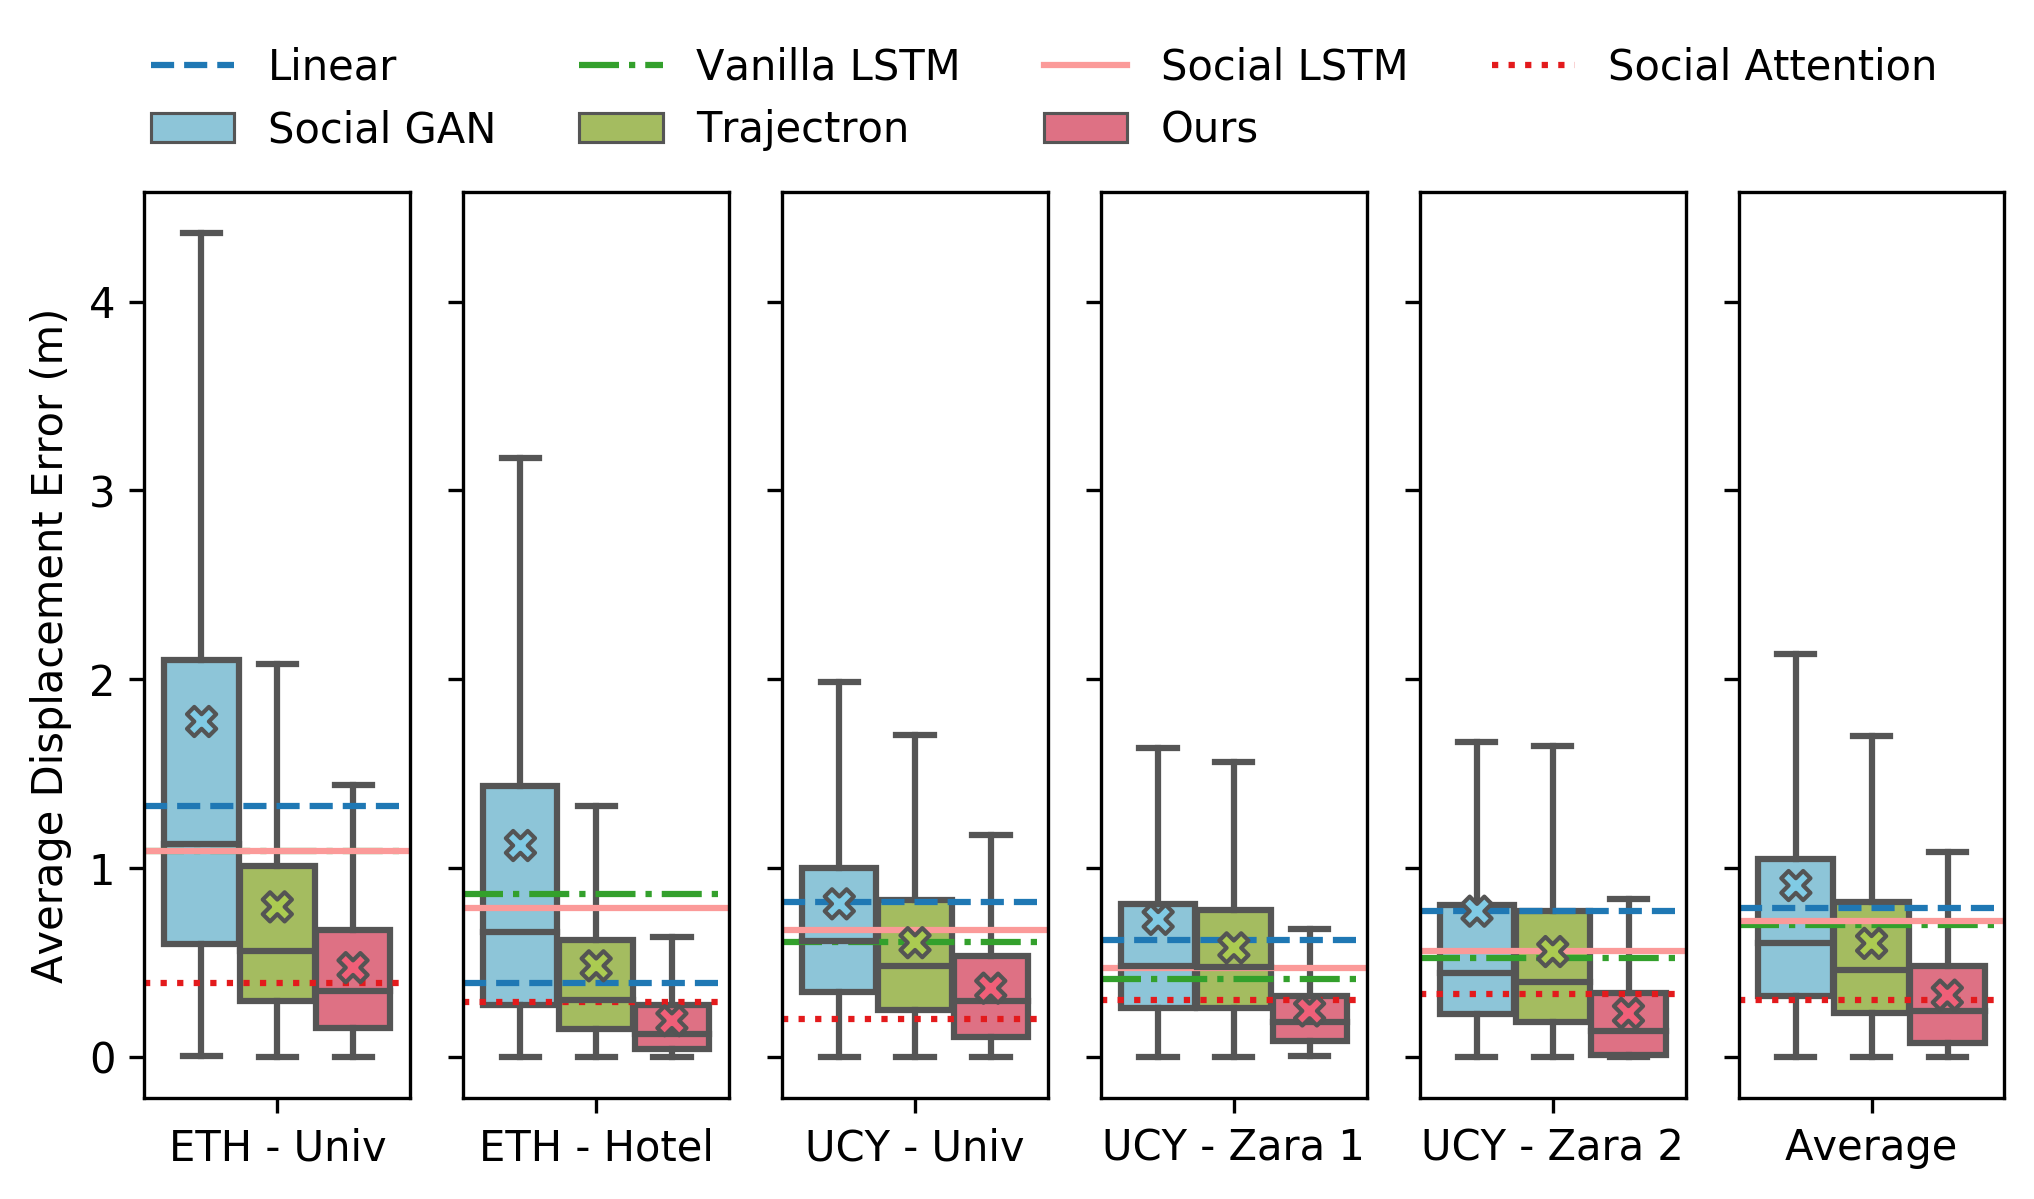

In [102]:
with sns.color_palette("muted"):
    fig_fse, ax_fses = plt.subplots(nrows=1, ncols=6, figsize=(8, 4), dpi=300, sharey=True)
    for idx, ax_fse in enumerate(ax_fses):
        dataset_name = dataset_names[idx]
        if dataset_name != 'Average':
            specific_df = perf_df[(perf_df['dataset'] == dataset_name) & (perf_df['error_type'] == 'ade')]
            specific_df['dataset'] = pretty_dataset_name(dataset_name)
        else:
            specific_df = perf_df[(perf_df['error_type'] == 'ade')].copy()
            specific_df['dataset'] = 'Average'

        sns.boxplot(x='dataset', y='error_value', hue='method',
            data=specific_df, ax=ax_fse, showfliers=False,
            palette=area_colors, hue_order=['sgan', 'Trajectron', alg_name], width=2.)

        ax_fse.get_legend().remove()
        ax_fse.set_xlabel('')
        ax_fse.set_ylabel('' if idx > 0 else 'Average Displacement Error (m)')

        ax_fse.scatter([-0.665, 0, 0.665],
               [np.mean(specific_df[specific_df['method'] == 'sgan']['error_value']),
                np.mean(specific_df[specific_df['method'] == 'Trajectron']['error_value']),
                np.mean(specific_df[specific_df['method'] == alg_name]['error_value'])],
               s=marker_size*marker_size, c=np.asarray(area_rgbs)/255.0, marker=mean_markers,
               edgecolors='#545454', zorder=10)
        
        for baseline_idx, (baseline, fse_val) in enumerate(prior_work_ade_results[pretty_dataset_name(dataset_name)].items()):
            ax_fse.axhline(y=fse_val, label=baseline, color=line_colors[baseline_idx], linestyle=linestyles[baseline_idx])
            
        if idx == 0:
            handles, labels = ax_fse.get_legend_handles_labels()


            handles = [handles[0], handles[4], handles[1], handles[5], handles[2], handles[6], handles[3]]
            labels = [labels[0], 'Social GAN', labels[1], 'Trajectron', labels[2], alg_name, labels[3]]

            ax_fse.legend(handles, labels, 
                          loc='lower center', bbox_to_anchor=(0.5, 0.9),
                          ncol=4, borderaxespad=0, frameon=False,
                          bbox_transform=fig_fse.transFigure)

#     fig_fse.text(0.51, 0.03, 'Dataset', ha='center')

plt.savefig('plots/ade_boxplots.pdf', dpi=300, bbox_inches='tight')

In [12]:
del perf_df

# KDE Negative Log Likelihood Attention Radius 3m

In [4]:
# Load Ours
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_12*kde_full.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
#perf_df.head()

results/eth_12_kde_full.csv
results/hotel_12_kde_full.csv
results/univ_12_kde_full.csv
results/zara1_12_kde_full.csv
results/zara2_12_kde_full.csv


/home/borisi/anaconda3/envs/gentraj/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [5]:
# # Load Trajectron and SGAN
# lls_df = pd.concat([pd.read_csv(f) for f in glob.glob('csv/old/curr_*_lls.csv')], ignore_index=True)
# lls_df.loc[lls_df['method'] == 'our_full', 'method'] = 'Trajectron'
# lls_df['error_type'] = 'KDE'
# #lls_df.head()

In [6]:
for dataset in dataset_names:
    if dataset != 'Average':
        print('KDE NLL for ' + pretty_dataset_name(dataset))
        #print(f"SGAN: {-lls_df[(lls_df['method'] == 'sgan') & (lls_df['dataset'] == dataset)]['log-likelihood'].mean()}")
        #print(f"Trajectron: {-lls_df[(lls_df['method'] == 'Trajectron')  & (lls_df['dataset'] == dataset)]['log-likelihood'].mean()}")
        print(f"{alg_name}: {perf_df[(perf_df['method'] == alg_name) & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print('KDE NLL for ' + pretty_dataset_name(dataset))
        #print(f"SGAN: {-lls_df[(lls_df['method'] == 'sgan')]['log-likelihood'].mean()}")
        #print(f"Trajectron: {-lls_df[(lls_df['method'] == 'Trajectron')]['log-likelihood'].mean()}")
        print(f"{alg_name}: {perf_df[(perf_df['method'] == alg_name)]['value'].mean()}")
              

KDE NLL for ETH - Univ
Ours: 1.3068431681049446
KDE NLL for ETH - Hotel
Ours: -1.939345347471224
KDE NLL for UCY - Univ
Ours: -1.1288059163920086
KDE NLL for UCY - Zara 1
Ours: -1.4119791272274707
KDE NLL for UCY - Zara 2
Ours: -2.525154634369542
KDE NLL for Average
Ours: -1.392358401395975


In [7]:
del perf_df

# Most Likely FDE Attention Radius 3m

In [8]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_12*fde_most_likely.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron++'
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_12_fde_most_likely.csv
results/hotel_12_fde_most_likely.csv
results/univ_12_fde_most_likely.csv
results/zara1_12_fde_most_likely.csv
results/zara2_12_fde_most_likely.csv


In [9]:
for dataset in dataset_names:
    print('FDE Most Likely for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++') & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++')]['value'].mean()}")

FDE Most Likely for ETH - Univ
Ours: 1.6763703267322265
FDE Most Likely for ETH - Hotel
Ours: 0.4614785391399073
FDE Most Likely for UCY - Univ
Ours: 1.0747924515297491
FDE Most Likely for UCY - Zara 1
Ours: 0.7704666189102252
FDE Most Likely for UCY - Zara 2
Ours: 0.5865659029486421
FDE Most Likely for Average
Ours: 0.9542581296327649


In [10]:
del perf_df

# Most Likely ADE Attention Radius 3m

In [11]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_12*ade_most_likely.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron++'
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_12_ade_most_likely.csv
results/hotel_12_ade_most_likely.csv
results/univ_12_ade_most_likely.csv
results/zara1_12_ade_most_likely.csv
results/zara2_12_ade_most_likely.csv


In [12]:
for dataset in dataset_names:
    print('ADE Most Likely for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++') & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++')]['value'].mean()}")

ADE Most Likely for ETH - Univ
Ours: 0.7052341524825474
ADE Most Likely for ETH - Hotel
Ours: 0.21620184785291033
ADE Most Likely for UCY - Univ
Ours: 0.40926643885853664
ADE Most Likely for UCY - Zara 1
Ours: 0.2972134362490682
ADE Most Likely for UCY - Zara 2
Ours: 0.22585898118058487
ADE Most Likely for Average
Ours: 0.3661968268243691


In [13]:
del perf_df

# Best of 20 Evaluation FDE Attention Radius 3m

In [14]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_12*fde_best_of.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_12_fde_best_of.csv
results/hotel_12_fde_best_of.csv
results/univ_12_fde_best_of.csv
results/zara1_12_fde_best_of.csv
results/zara2_12_fde_best_of.csv


In [15]:
for dataset in dataset_names:
    print('FDE Best of 20 for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name) & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name)]['value'].mean()}")

FDE Best of 20 for ETH - Univ
Trajectron++: 0.8574431969131285
FDE Best of 20 for ETH - Hotel
Trajectron++: 0.19084707198210932
FDE Best of 20 for UCY - Univ
Trajectron++: 0.4287221576716801
FDE Best of 20 for UCY - Zara 1
Trajectron++: 0.3159092794417088
FDE Best of 20 for UCY - Zara 2
Trajectron++: 0.25292433731989494
FDE Best of 20 for Average
Trajectron++: 0.38676102425417497


In [16]:
del perf_df

# Best of 20 Evaluation ADE Attention Radius 3m

In [17]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_12*ade_best_of.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_12_ade_best_of.csv
results/hotel_12_ade_best_of.csv
results/univ_12_ade_best_of.csv
results/zara1_12_ade_best_of.csv
results/zara2_12_ade_best_of.csv


In [18]:
for dataset in dataset_names:
    print('ADE Best of 20 for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name) & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name)]['value'].mean()}")

ADE Best of 20 for ETH - Univ
Trajectron++: 0.4334745882075259
ADE Best of 20 for ETH - Hotel
Trajectron++: 0.12103208674836993
ADE Best of 20 for UCY - Univ
Trajectron++: 0.2200696369591878
ADE Best of 20 for UCY - Zara 1
Trajectron++: 0.16745747931164434
ADE Best of 20 for UCY - Zara 2
Trajectron++: 0.12485689651978099
ADE Best of 20 for Average
Trajectron++: 0.1987725413014945


In [19]:
del perf_df

# KDE Negative Log Likelihood Attention Radius 3m Velocity

In [20]:
# Load Ours
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_vel_12*kde_full.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
#perf_df.head()

results/eth_vel_12_kde_full.csv
results/hotel_vel_12_kde_full.csv
results/univ_vel_12_kde_full.csv
results/zara1_vel_12_kde_full.csv
results/zara2_vel_12_kde_full.csv


In [21]:
# # Load Trajectron and SGAN
# lls_df = pd.concat([pd.read_csv(f) for f in glob.glob('csv/old/curr_*_lls.csv')], ignore_index=True)
# lls_df.loc[lls_df['method'] == 'our_full', 'method'] = 'Trajectron'
# lls_df['error_type'] = 'KDE'
# #lls_df.head()

In [22]:
for dataset in dataset_names:
    if dataset != 'Average':
        print('KDE NLL for ' + pretty_dataset_name(dataset))
        #print(f"SGAN: {-lls_df[(lls_df['method'] == 'sgan') & (lls_df['dataset'] == dataset)]['log-likelihood'].mean()}")
        #print(f"Trajectron: {-lls_df[(lls_df['method'] == 'Trajectron')  & (lls_df['dataset'] == dataset)]['log-likelihood'].mean()}")
        print(f"{alg_name}: {perf_df[(perf_df['method'] == alg_name) & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print('KDE NLL for ' + pretty_dataset_name(dataset))
        #print(f"SGAN: {-lls_df[(lls_df['method'] == 'sgan')]['log-likelihood'].mean()}")
        #print(f"Trajectron: {-lls_df[(lls_df['method'] == 'Trajectron')]['log-likelihood'].mean()}")
        print(f"{alg_name}: {perf_df[(perf_df['method'] == alg_name)]['value'].mean()}")
              

KDE NLL for ETH - Univ
Ours: 1.7987703559884305
KDE NLL for ETH - Hotel
Ours: -1.2864991518790894
KDE NLL for UCY - Univ
Ours: -0.8897570611371921
KDE NLL for UCY - Zara 1
Ours: -1.1275849983603234
KDE NLL for UCY - Zara 2
Ours: -2.1946898640072234
KDE NLL for Average
Ours: -1.1171728799903844


In [23]:
del perf_df

# Most Likely FDE Attention Radius 3m Velocity

In [24]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_vel_12*fde_most_likely.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron++'
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_vel_12_fde_most_likely.csv
results/hotel_vel_12_fde_most_likely.csv
results/univ_vel_12_fde_most_likely.csv
results/zara1_vel_12_fde_most_likely.csv
results/zara2_vel_12_fde_most_likely.csv


In [25]:
for dataset in dataset_names:
    print('FDE Most Likely for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++') & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++')]['value'].mean()}")

FDE Most Likely for ETH - Univ
Ours: 1.6595803163079856
FDE Most Likely for ETH - Hotel
Ours: 0.4577661486145857
FDE Most Likely for UCY - Univ
Ours: 1.1657061102834114
FDE Most Likely for UCY - Zara 1
Ours: 0.792450220754066
FDE Most Likely for UCY - Zara 2
Ours: 0.5878910318410495
FDE Most Likely for Average
Ours: 1.0204553297895693


In [26]:
del perf_df

# Most Likely Evaluation ADE Attention Radius 3m Velocity

In [27]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_vel_12*ade_most_likely.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron++'
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_vel_12_ade_most_likely.csv
results/hotel_vel_12_ade_most_likely.csv
results/univ_vel_12_ade_most_likely.csv
results/zara1_vel_12_ade_most_likely.csv
results/zara2_vel_12_ade_most_likely.csv


In [28]:
for dataset in dataset_names:
    print('ADE Most Likely for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++') & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron++')]['value'].mean()}")

ADE Most Likely for ETH - Univ
Ours: 0.7081645037230024
ADE Most Likely for ETH - Hotel
Ours: 0.21800273126936145
ADE Most Likely for UCY - Univ
Ours: 0.4429943056454118
ADE Most Likely for UCY - Zara 1
Ours: 0.30200377722385563
ADE Most Likely for UCY - Zara 2
Ours: 0.22635933788153614
ADE Most Likely for Average
Ours: 0.3907335607353219


In [29]:
del perf_df

# Best of 20 Evaluation FDE Attention Radius 3m Velocity

In [30]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_vel_12*fde_best_of.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_vel_12_fde_best_of.csv
results/hotel_vel_12_fde_best_of.csv
results/univ_vel_12_fde_best_of.csv
results/zara1_vel_12_fde_best_of.csv
results/zara2_vel_12_fde_best_of.csv


In [31]:
for dataset in dataset_names:
    print('FDE Best of 20 for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name) & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name)]['value'].mean()}")

FDE Best of 20 for ETH - Univ
Trajectron++: 0.8281783496158873
FDE Best of 20 for ETH - Hotel
Trajectron++: 0.20567153121359805
FDE Best of 20 for UCY - Univ
Trajectron++: 0.44246075609459684
FDE Best of 20 for UCY - Zara 1
Trajectron++: 0.3307553133179889
FDE Best of 20 for UCY - Zara 2
Trajectron++: 0.24909920986736078
FDE Best of 20 for Average
Trajectron++: 0.39711722810872235


In [32]:
del perf_df

# Best of 20 Evaluation ADE Attention Radius 3m Velocity

In [33]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"results/{dataset}_vel_12*ade_best_of.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True, sort=False)
        del perf_df['Unnamed: 0']

results/eth_vel_12_ade_best_of.csv
results/hotel_vel_12_ade_best_of.csv
results/univ_vel_12_ade_best_of.csv
results/zara1_vel_12_ade_best_of.csv
results/zara2_vel_12_ade_best_of.csv


In [34]:
for dataset in dataset_names:
    print('ADE Best of 20 for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name) & (perf_df['dataset'] == dataset)]['value'].mean()}")
    else:
        print(f"Trajectron++: {perf_df[(perf_df['method'] == alg_name)]['value'].mean()}")

ADE Best of 20 for ETH - Univ
Trajectron++: 0.39238413417612106
ADE Best of 20 for ETH - Hotel
Trajectron++: 0.11769507047457346
ADE Best of 20 for UCY - Univ
Trajectron++: 0.1990357831124613
ADE Best of 20 for UCY - Zara 1
Trajectron++: 0.15218487860383714
ADE Best of 20 for UCY - Zara 2
Trajectron++: 0.11350252815738102
ADE Best of 20 for Average
Trajectron++: 0.1802170043575296


In [35]:
del perf_df